<a href="https://colab.research.google.com/github/persie27/My-Works/blob/main/AML_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay

import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('drive/MyDrive/data.csv')
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


> We can use info function to see the summary of dataframe

## **Exploratory Data Analysis**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


> We can see the dimensionality of the dataframe

In [5]:
df.shape

(6362620, 11)

### **Insights**:


*   We have **6362620** rows and **11** columns in the datset
*   We have **5** columns of float datatype.
*   We have **3** columns of integer datatype.
*   We have **3** columns of object datatype.






> We will explore more about the missing and the duplicate values

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

> There are no missing values

In [7]:
df.duplicated().sum()

0

>Let's have a look at the column names to see if they need any correction or not. We usually do this to see typo errors

In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

>We can rename the columns to make it easily comprehensible

In [9]:
df = df.rename(columns ={'nameOrig' : 'origin', 'oldbalanceOrg' : 'sender_old_balance', 'newbalanceOrig': 'sender_new_balance', 'nameDest' : 'destination', 'oldbalanceDest' : 'receiver_old_balance', 'newbalanceDest': 'receiver_new_balance', 'isFraud' : 'isfraud'})

In [10]:
df.head(5)

,step,type,amount,origin,sender_old_balance,sender_new_balance,destination,receiver_old_balance,receiver_new_balance,isfraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


>We can remove unwanted columns like 'isFlaggedFraud' and 'step'

In [11]:
df.drop(columns = ['isFlaggedFraud','step'], axis = 1, inplace= True)

In [12]:
df.head(5)

,type,amount,origin,sender_old_balance,sender_new_balance,destination,receiver_old_balance,receiver_new_balance,isfraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


### **Insights**:


*   We saw that there are no null and duplicate values
*   We renamed few columns for better understanding





([0, 1, 2, 3, 4],
 [Text(0, 0, 'PAYMENT'),
  Text(1, 0, 'TRANSFER'),
  Text(2, 0, 'CASH_OUT'),
  Text(3, 0, 'DEBIT'),
  Text(4, 0, 'CASH_IN')])

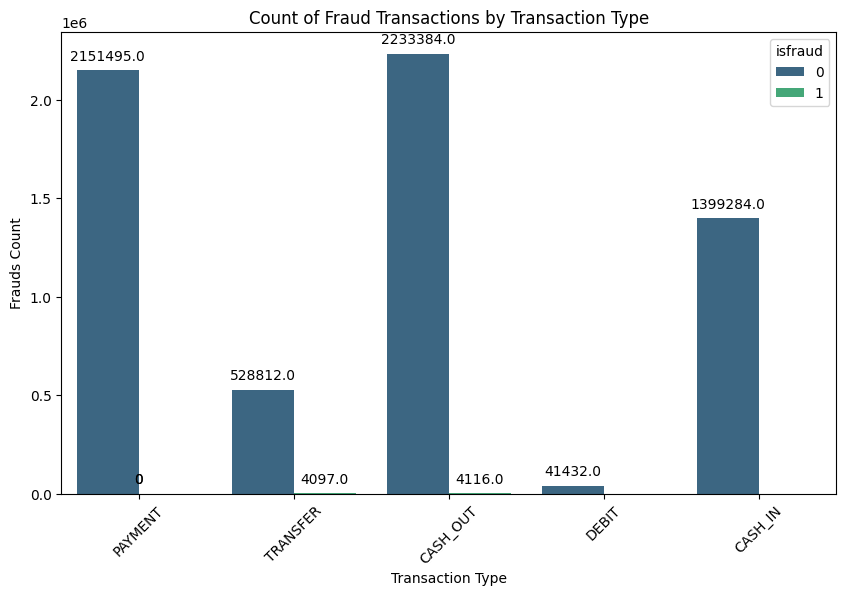

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='type', hue = 'isfraud', palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Count of Fraud Transactions by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Frauds Count')
plt.xticks(rotation=45)

>We can see that fraud transactions happened in transaction types :

*   Transfer
*   Cash_Out



> We will check the origin from where transfers are done

In [14]:
transfer_fraud = df[((df['type']=='TRANSFER') & df['isfraud']==1)]
transfer_fraud['origin'].value_counts()

origin
C1305486145    1
C202278158     1
C12585107      1
C946427395     1
C1069177491    1
              ..
C2090764492    1
C1794935564    1
C318078280     1
C939293281     1
C1685995037    1
Name: count, Length: 4097, dtype: int64

> We will check the destination where fraud cash outs are made

In [15]:
cash_out_fraud = df[(df['type'] == 'CASH_OUT') & (df['isfraud'] == 1)]
cash_out_fraud['destination'].value_counts()

destination
C200064275     2
C1399829166    2
C1650668671    2
C2129197098    2
C1013511446    2
              ..
C1566713324    1
C1955464150    1
C1104137869    1
C377165949     1
C873221189     1
Name: count, Length: 4091, dtype: int64

> We will check whether the origin and destination accounts are same , if any.

In [16]:
print("Are there any transactions where the origin and destination are same?")
cash_out_fraud.destination.isin(transfer_fraud.origin).any()

Are there any transactions where the origin and destination are same?


False

### **Insights**:


* Fraud transactions are done in TRANSFER and CASH_OUT transaction type.
* The fraud transactions in **TRANSFER** were **4097** and **CASH_OUT** were **4116**.
* The fraud transactions were generally from **Customer** to **Customer**
* The transactions account used for Receiving and Sending were not Same in case of Fraud transactions.




## **Feature Engineering**

In [17]:
df.head(5)

,type,amount,origin,sender_old_balance,sender_new_balance,destination,receiver_old_balance,receiver_new_balance,isfraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [18]:
data = df.copy()
data['type2'] = np.nan
data.loc[df['origin'].str.startswith('C') & df['destination'].str.startswith('C'), 'type2'] = 'CC'
data.loc[df['origin'].str.startswith('C') & df['destination'].str.startswith('M'), 'type2'] = 'CM'
data.loc[df['origin'].str.startswith('M') & df['destination'].str.startswith('C'), 'type2'] = 'MC'
data.loc[df['origin'].str.startswith('M') & df['destination'].str.startswith('M'), 'type2'] = 'MM'

In [19]:
data.head(5)

,type,amount,origin,sender_old_balance,sender_new_balance,destination,receiver_old_balance,receiver_new_balance,isfraud,type2
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,CM
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,CM
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,CC
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,CC
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,CM


In [20]:
data.drop(columns = ['origin','destination'], axis =1, inplace = True)

In [21]:
data.head(5)

,type,amount,sender_old_balance,sender_new_balance,receiver_old_balance,receiver_new_balance,isfraud,type2
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,CM
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,CM
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,CC
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,CC
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,CM


> We will check the fraud transaction counts based on type2 column

In [22]:
fraud_trans = data[data['isfraud'] == 1]
valid_trans = data[data['isfraud'] == 0]

print('Number of fraud transactions: ', fraud_trans.type2.value_counts(), '\n')
print('Number of valid transactions: ', valid_trans.type2.value_counts())

Number of fraud transactions:  type2
CC    8213
Name: count, dtype: int64 

Number of valid transactions:  type2
CC    4202912
CM    2151495
Name: count, dtype: int64


### **Insights:**


*  We did feature engineering and created a new column type2 that contained the type of transaction between Customers and Merchants.
*   The number of **Fraud Transactions** in total were **8213** and were made from **Customer to Customer**.
* The number of Valid Transactions made from **Customer to Customer** are **4202912**.
* The number of Valid Transactions made from **Customer to Merchant** are **2151495**.

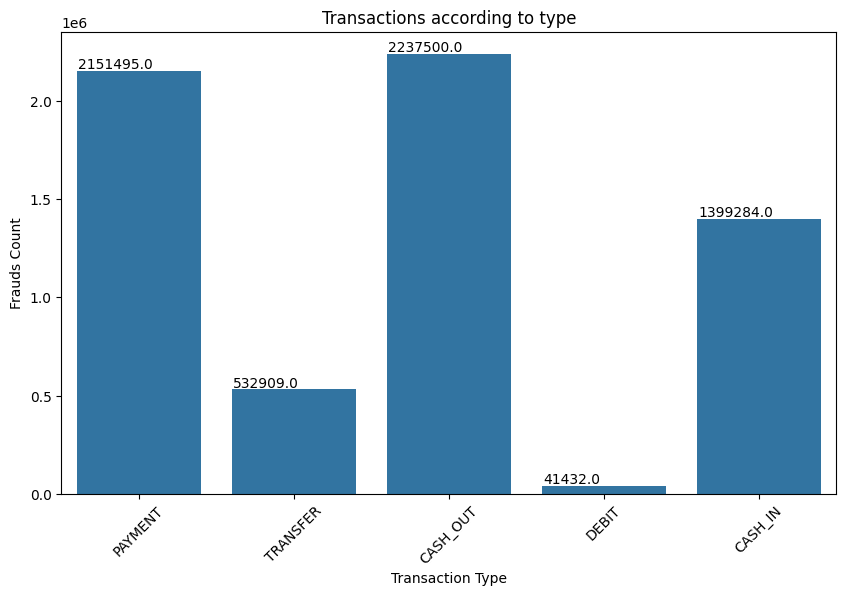

In [23]:
plt.figure(figsize = (10, 6))
ax=sns.countplot(data = data, x = "type")
plt.title('Transactions according to type')
plt.xlabel('Transaction Type')
plt.ylabel('Frauds Count')
plt.xticks(rotation=45)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10000))

### **Insights:**
* Most common transaction type used for transactions = **CASH_OUT** .

>We will use dummy hot encoding as the columns **type** and **type2** does not have a specific order.

In [24]:
data = pd.get_dummies(data, prefix = ['type', 'type2'], drop_first = True)

In [25]:
data.head(5)

,amount,sender_old_balance,sender_new_balance,receiver_old_balance,receiver_new_balance,isfraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,type2_CM
0,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,True,False,True
1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,True,False,True
2,181.00,181.0,0.00,0.0,0.0,1,False,False,False,True,False
3,181.00,181.0,0.00,21182.0,0.0,1,True,False,False,False,False
4,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,True,False,True


## **Model Training**

>Now it's time to split the dataset into training and testing part and then do the standardization.

In [26]:
X = data.drop('isfraud',axis = 1)
y = data['isfraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify = y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

>We will train 3 ML models. Then, we will append each model into the list.

In [27]:
rfc = RandomForestClassifier(n_estimators = 25, n_jobs = -1, random_state = 32)
xgc = xgb.XGBClassifier(max_depth = 3, n_jobs = -1, random_state = 42, learning_rate = 0.1)
log= LogisticRegression(random_state = 25, solver='liblinear', max_iter=1000)
svcl = SVC(random_state = 35)
# lgbm = LGBMClassifier(boosting_type = 'gbdt',objective = 'binary', random_state = 8888)

rfc.fit(X_train, y_train)
# lgbm.fit(X_train, y_train)
xgc.fit(X_train, y_train)
log.fit(X_train, y_train)

classifiers = []
classifiers.append(rfc)
# classifiers.append(lgbm)
classifiers.append(xgc)
classifiers.append(log)

>We will do the prediction and find out both Accuracy and Area Under Curve (AUC) of each model.

In [28]:
accuracy_list = []
auc_list = []

for classifier in classifiers:
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[:,1]
    accuracy_list.append(accuracy_score(y_test, y_pred))
    auc_list.append(roc_auc_score(y_test, y_pred_proba))

accuracy_dict = {}
auc_dict = {}
for i in range(3):
    key=['Random Forest', 'XGBoost','LR'][i]
    accuracy_dict[key] = accuracy_list[i]
    auc_dict[key] = auc_list[i]

accuracy_dict_sorted = dict(sorted(accuracy_dict.items(), key = lambda item: item[1]))
auc_dict_sorted = dict(sorted(auc_dict.items(), key = lambda item: item[1]))

In [31]:
def px_bar(x,y,text,title,color,color_discrete_sequence):
    return px.bar(x = x, y = y, text = text, title = title, color = color, color_discrete_sequence=color_discrete_sequence)


In [34]:
fig = px_bar(list(accuracy_dict_sorted.keys()), list(accuracy_dict_sorted.values()), np.round(list(accuracy_dict_sorted.values()),3), 'Accuracy score of each classifiers', list(accuracy_dict_sorted.keys()), px.colors.sequential.matter)
# for idx in [2,3]:
#     fig.data[idx].marker.line.width = 3
#     fig.data[idx].marker.line.color = "black"
fig.show()

In [35]:
fig = px_bar(list(auc_dict_sorted.keys()), list(auc_dict_sorted.values()), np.round(list(auc_dict_sorted.values()),3), 'AUC score of each classifiers', list(auc_dict_sorted.keys()), px.colors.sequential.matter)

fig.show()

## **Model Evaluation**


In [36]:
xg = xgb.XGBClassifier(max_depth = 3, n_jobs = -1, random_state = 42, learning_rate = 0.1)
xg.fit(X_train,y_train)

xg_pred = xg.predict(X_test)
xg_pred_prob = xg.predict_proba(X_test)[:,1]

In [37]:
print(classification_report(y_test, xg_pred, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1906322
       Fraud       0.99      0.72      0.84      2464

    accuracy                           1.00   1908786
   macro avg       0.99      0.86      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786



>Showing the AUC below, XGBoost performance.

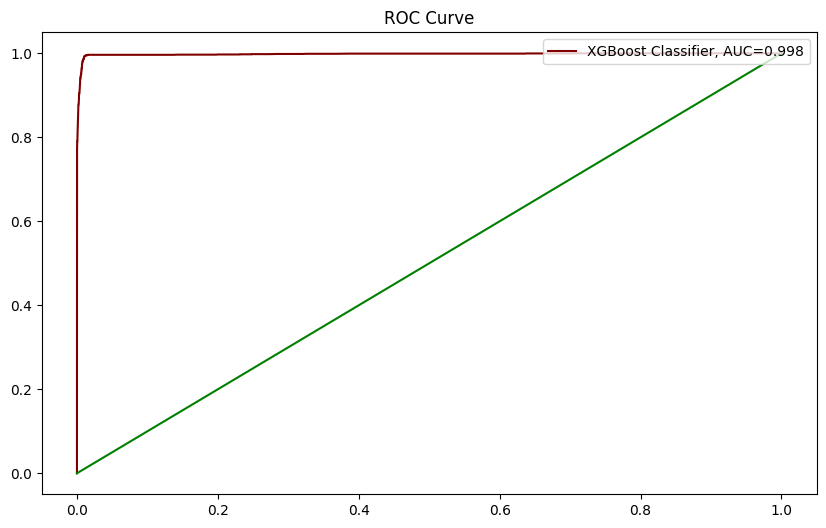

In [41]:
plt.figure(figsize = (10, 6))
fpr, tpr, temp = roc_curve(y_test, xg_pred_prob)
auc = round(roc_auc_score(y_test, xg_pred_prob),3)
plt.plot(fpr,tpr,label='XGBoost Classifier, AUC='+str(auc),linestyle='solid',color='#800000')
plt.plot([0, 1], [0, 1], color = 'g')
plt.title('ROC Curve')
plt.legend(loc='upper right')

## **Conclusion**

>The total number of fraud transactions were 8213 out of 6362620 transactions. These fraud transactions were either CASH_OUT or DEBIT and were made from a Customer to Customer account. We trained 3 algorithms and XgBoost performed the best among them. It gave the AUC score of 0.99.